<a href="https://colab.research.google.com/github/ranton256/imdb_reviews_dataset_explore/blob/main/reviews_data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS613 Final Project Dataset
Drexel CS 613
Fall 2022

Richard Anton
rna63@drexel.edu

This dataset originates from

https://www.kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn/data


# Getting the dataset

The article at https://www.kaggle.com/general/74235 describes how to download Kaggle data directly to colab using the Kaggle API.

1. Go to https://www.kaggle.com and log in.
2. Go to your account settings page using the icon in the top right to get to the menu and select "Settings".
3. Use Create New API Token.
4. Upload the kaggle.json file to the colab instance (there is a block below to do this.)
5. Move the uploaded file to ~/.kaggle/kaggle.json


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
! pip install -q kaggle

In [ ]:
# When you run this, select your kaggle.json credentials file to upload.
import os
from google.colab import files

if not os.path.exists('kaggle.json'):
  files.upload()

In [ ]:
# Move the kaggle.json file to the expected location
! test -d ~/.kaggle || mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the datset from Kaggle
! kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format

imdb-dataset-sentiment-analysis-in-csv-format.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extract the dataset files from the ZIP archive.
import zipfile as zf
zip_path = "/content/imdb-dataset-sentiment-analysis-in-csv-format.zip"

with zf.ZipFile(zip_path,'r') as files:
  files.extractall()
  files.close()

In [ ]:
# check that we have the files expected.
!ls *.csv
# count lines in each portion
!wc -l *.csv

Test.csv  Train.csv  Valid.csv
    5001 Test.csv
   40001 Train.csv
    5001 Valid.csv
   50003 total


In [ ]:
# Load the training data with pandas and look at the first few rows.

train_df=pd.read_csv("Train.csv")
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
train_df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


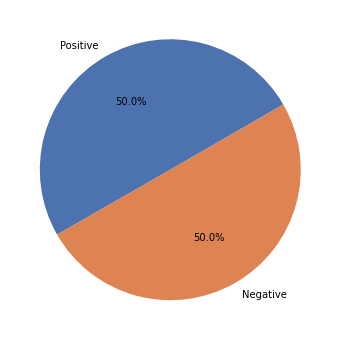

In [ ]:
pos=train_df[train_df['label']==1]
neg=train_df[train_df['label']==0]
pie_data = [pos['label'].count(),neg['label'].count()]

fig=plt.figure(figsize=(6, 6))
colors = sns.color_palette('deep')[0:5]
labels=["Positive","Negative"]
plt.pie(pie_data, autopct ='%1.1f%%', startangle = 30, labels=labels, colors = colors)
plt.show()

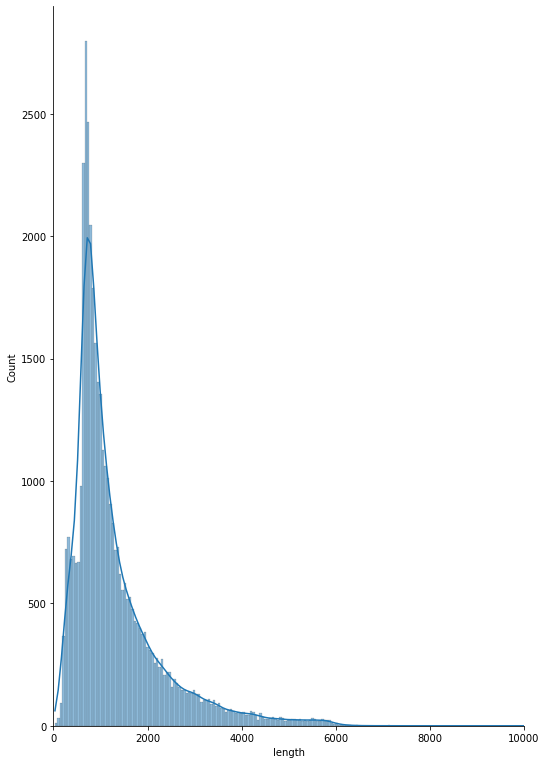

In [ ]:
# Show Stats and histogram of text length.
len_data = pd.DataFrame(columns=['length'])
len_data['length'] = train_df['text'].str.len()

len_data.describe()

len_data.head()

hist_graph = sns.displot(legend="Review Length", 
                         data=len_data, x="length",  log_scale=False, kde=True)
hist_graph.set(xlim=(0, 10000))
hist_graph.fig.set_figwidth(8.27)
hist_graph.fig.set_figheight(11.7)



In [ ]:
X_train = train_df['text']
y_train = train_df['label']
reviews=X_train.values
pos_reviews=train_df[train_df['label']==1].values
neg_reviews=train_df[train_df['label']==0].values


In [ ]:
# do same preprocessing for stopwords we are going to do in the txt.

#print(type(reviews))
#reviews
PUNCTUATION = [',', '.', ';', '!', '?', '"', '(', ')', '*', '-', '/']

# TODO: use the same stopwords.
STOPWORDS = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',
             'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
             'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
             'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
             'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
             'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
             'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
             'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
             'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
             'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
             'now']
my_stopwords = set(STOPWORDS)
print(my_stopwords)


{'until', 'he', 'me', 'at', 'is', 'ourselves', 'they', 'which', 'herself', 'himself', 'so', 'my', 'all', 'you', 'against', 'have', 'can', 'other', 'will', 'yourselves', 'too', 'same', 't', 'than', 'here', 'hers', 'did', 'under', 'nor', 'are', 'it', 'again', 'don', 'out', 'your', 'yourself', 'its', 'after', 'those', 'any', 'them', 'as', 'to', 'myself', 'both', 'whom', 'up', 'each', 'yours', 'with', 'where', 'into', 'now', 'am', 'having', 'themselves', 'be', 'own', 'itself', 'what', 'doing', 'for', 'his', 'most', 'or', 'between', 'their', 'our', 'of', 'further', 'because', 'few', 'before', 'there', 'she', 'if', 'very', 'such', 'how', 'had', 'from', 'this', 's', 'off', 'not', 'below', 'him', 'her', 'through', 'more', 'should', 'has', 'some', 'who', 'only', 'these', 'been', 'during', 'was', 'theirs', 'being', 'a', 'why', 'were', 'then', 'i', 'about', 'while', 'on', 'the', 'an', 'we', 'no', 'do', 'that', 'when', 'above', 'in', 'just', 'by', 'once', 'does', 'ours', 'and', 'down', 'but', 'ove

In [ ]:
from wordcloud import WordCloud
def plot_reviews_word_cloud(review_set, title):
  cloud = WordCloud(background_color='black', stopwords=my_stopwords).generate(str(review_set))
  fig = plt.figure(figsize=(12,8), facecolor='white')
  plt.imshow(cloud, interpolation="bilinear")
  plt.axis('off')
  plt.title(title, fontsize=48)
  plt.tight_layout(pad=0)
  plt.show()

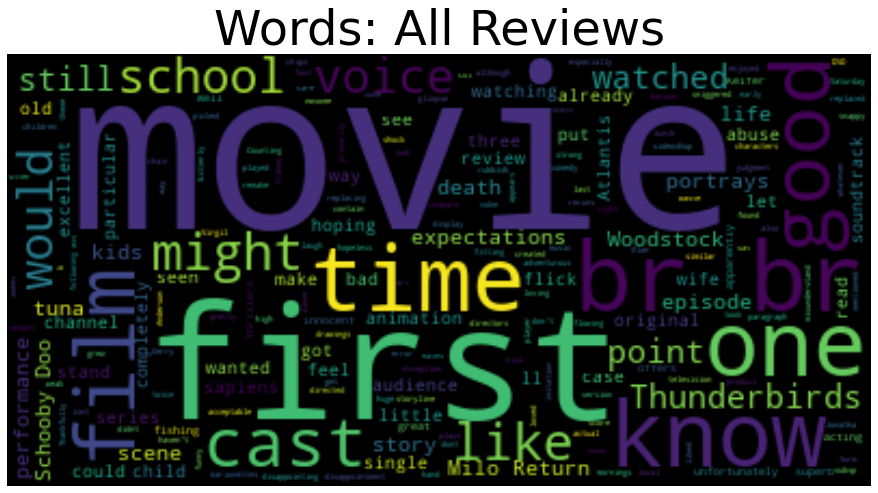

In [ ]:
plot_reviews_word_cloud(reviews, 'Words: All Reviews')

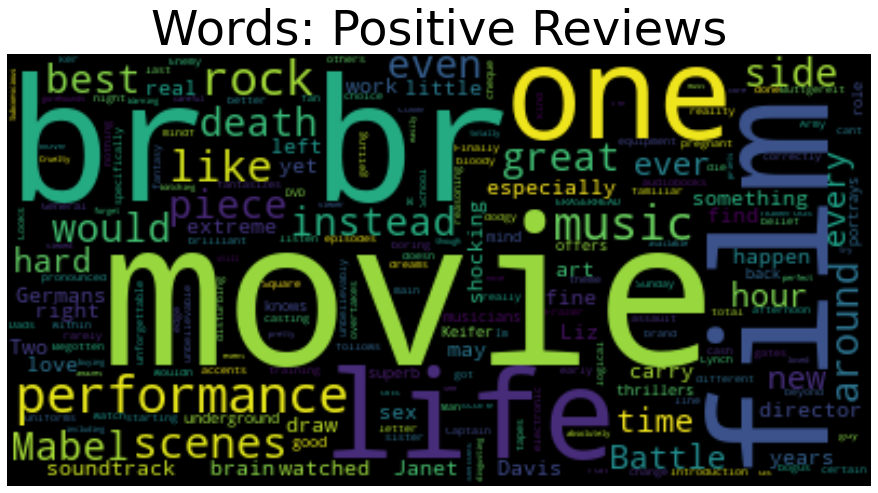

In [ ]:
plot_reviews_word_cloud(pos_reviews, 'Words: Positive Reviews')

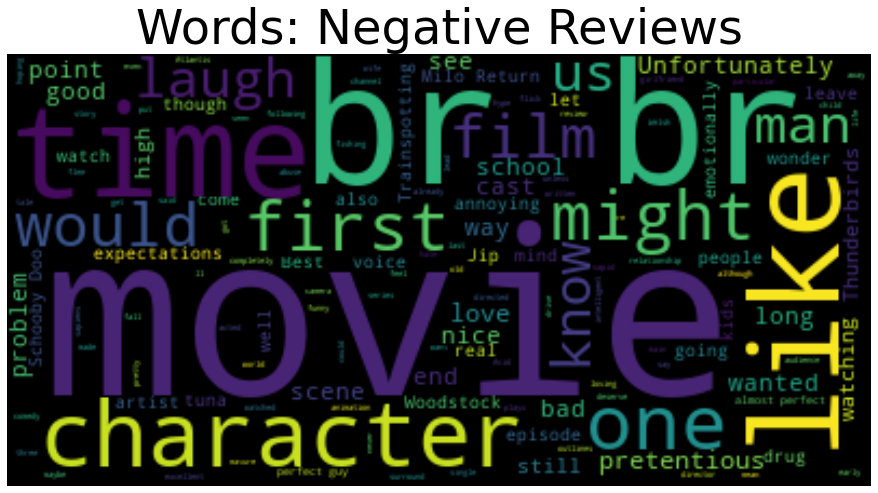

In [ ]:
plot_reviews_word_cloud(neg_reviews, 'Words: Negative Reviews')

In [ ]:
# count number of occurences of unique words
# from collections import Counter

# results = Counter()
# X_train.str.lower().str.split().apply(results.update)
# print(results)

# NOT really working.


In [ ]:
# Transform the data to one-hot style encoding/bag of words.
count_vec = CountVectorizer()

X_train_count = count_vec.fit_transform(X_train)

X_train_count.shape

(40000, 92908)